In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this lab project, we used the California Housing Prices dataset to apply data exploration, preprocessing, feature engineering, vizualization, and model building to solve the issue of predicting house prices. Building prediction models have proved to be a useful approach to solving the issue of predicting house prices. 

First, we explored the data to look for anything that needed to be preprocessed before model building.

In [2]:
#DATA EXPLORATION

In [3]:
#read dataset
data = pd.read_csv("housing.csv")

In [4]:
#print dataset
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


We noticed that there are null values, so we decided to take care of that first.

In [5]:
#print data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#dropping null values
data.dropna(inplace=True)

In [7]:
#print after erasing null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Next, we split the data into a training set and a testing set for model building later on. We used a 80:20 ratio. we assigned 80% of the dataset for training, and 20% for testing.

In [8]:
#split into training and testing data

from sklearn.model_selection import train_test_split

#assign dataset without the target variable column to x and only the target variable column to y
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [9]:
#print the dataset after removing the target variable column
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
#get training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
#join x and y to study corrrelation

train_data = x_train.join(y_train)

In [12]:
#print train set
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11765,-121.25,38.72,10.0,7277.0,1168.0,3507.0,1131.0,4.4850,INLAND,179400.0
1451,-121.97,37.97,27.0,1691.0,289.0,807.0,296.0,6.1168,INLAND,210500.0
12712,-121.40,38.59,18.0,2614.0,624.0,1181.0,616.0,2.0432,INLAND,156800.0
1361,-122.02,38.02,44.0,1465.0,247.0,817.0,237.0,4.8693,NEAR BAY,156900.0
7805,-118.09,33.89,42.0,1150.0,215.0,708.0,204.0,3.6875,<1H OCEAN,171500.0
...,...,...,...,...,...,...,...,...,...,...
8425,-118.34,33.92,29.0,1475.0,349.0,965.0,370.0,3.3558,<1H OCEAN,199600.0
13076,-121.30,38.59,25.0,3002.0,718.0,1660.0,613.0,2.1116,INLAND,89600.0
5093,-118.29,33.97,43.0,2660.0,672.0,2133.0,588.0,1.7734,<1H OCEAN,107300.0
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0


Next, we checked the distribution of the features to check if anything needed transformation and standardization. We noticed that some features needed log transformation and we applied it. We also did a heatmap to check how features correlate with each other and most importantly with the target variable.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

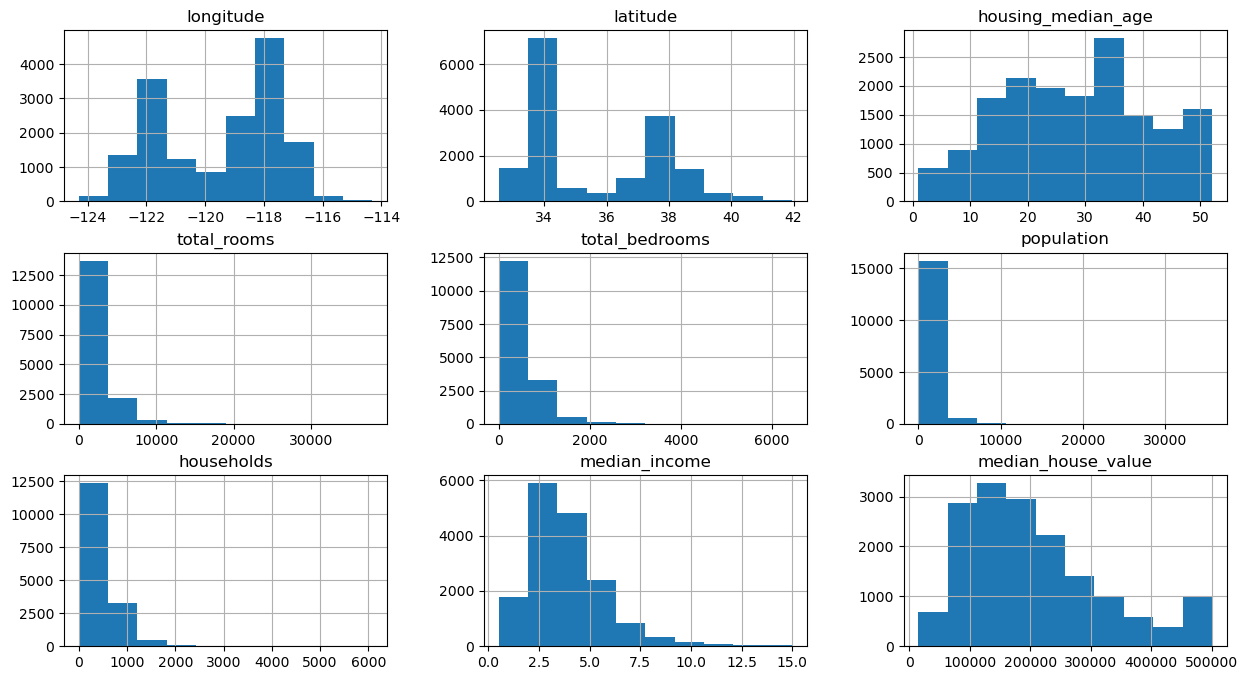

In [13]:
#distribution of individual various features

train_data.hist(figsize=(15,8))

/var/folders/06/h2ml2k_x2vndxbjs9zw07yvw0000gn/T/ipykernel_46299/467442023.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

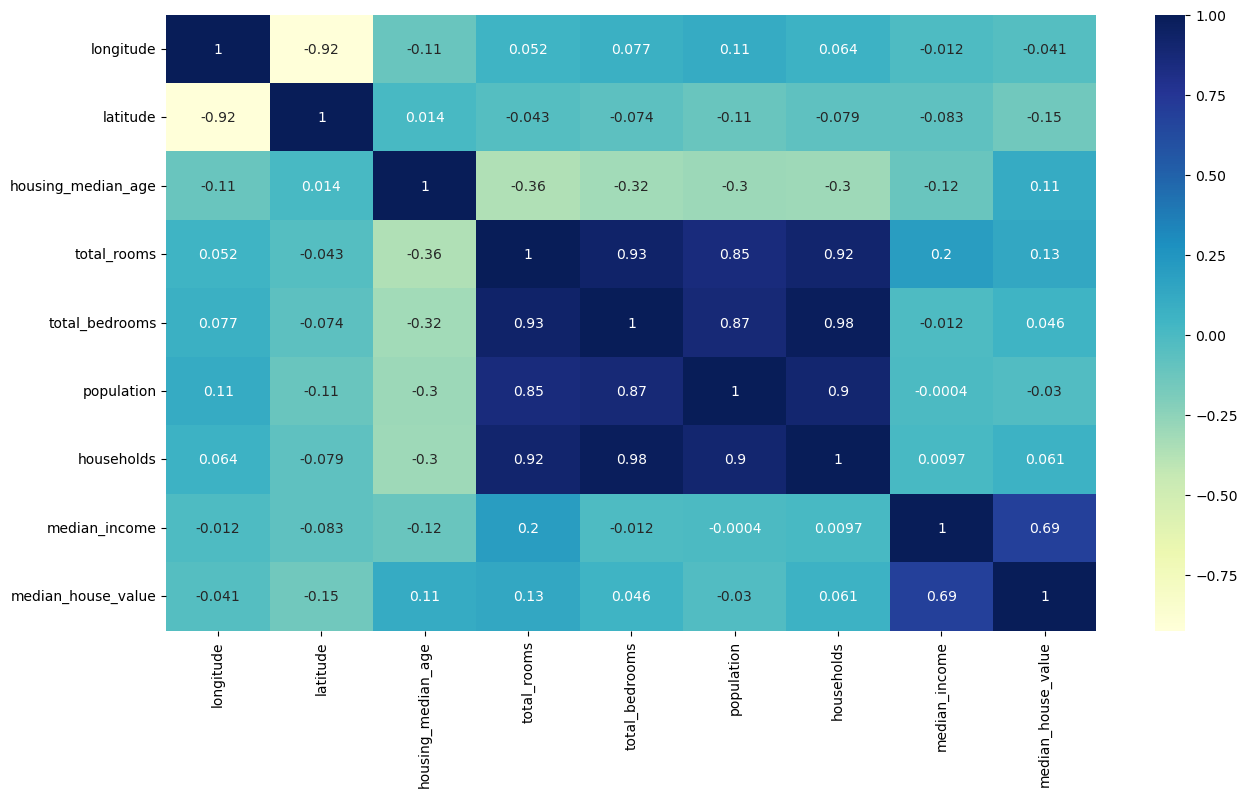

In [14]:
#this heatmap shows data correlation
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [16]:
#APPLYING LOG TRANSFORMATION FOR FEATURES THAT NEEDS IT
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

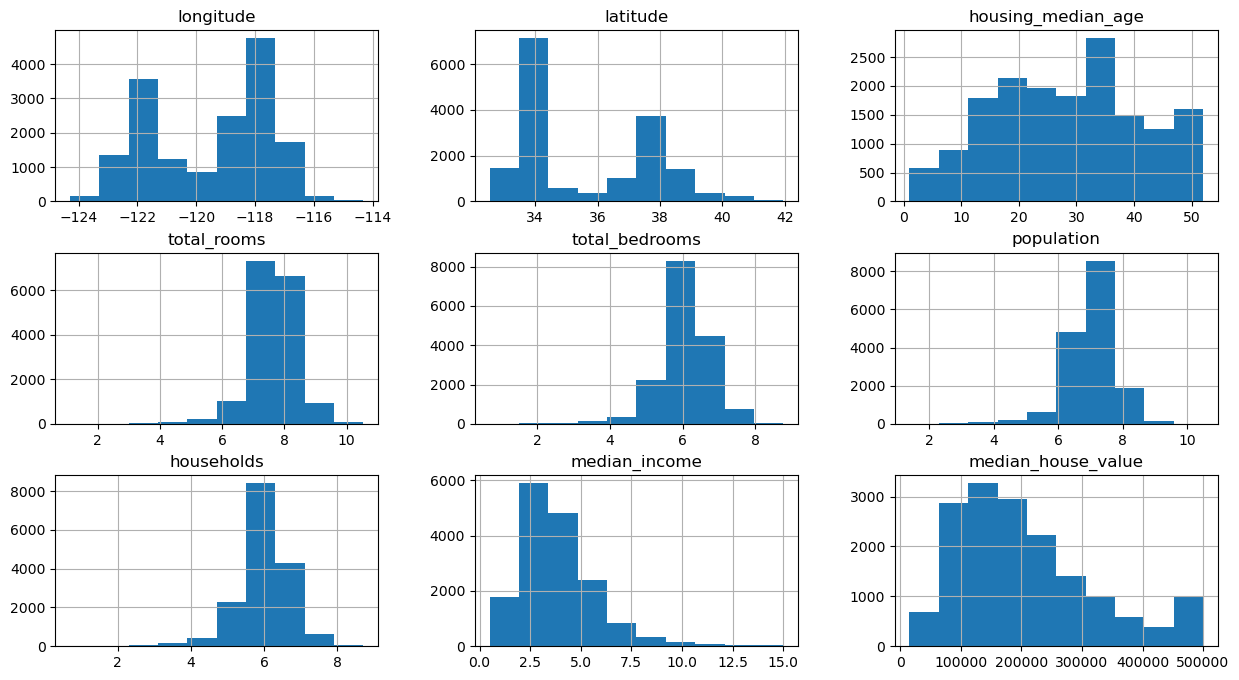

In [17]:
#PRINTING FEATURE HISTOGRAMS AFTER APPLYING LOG TRANSFORMATION
train_data.hist(figsize=(15,8))

In [18]:
#PRINTING TRAINING SET 
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11765,-121.25,38.72,10.0,8.892611,7.063904,8.162801,7.031741,4.4850,INLAND,179400.0
1451,-121.97,37.97,27.0,7.433667,5.669881,6.694562,5.693732,6.1168,INLAND,210500.0
12712,-121.40,38.59,18.0,7.869019,6.437752,7.074963,6.424869,2.0432,INLAND,156800.0
1361,-122.02,38.02,44.0,7.290293,5.513429,6.706862,5.472271,4.8693,NEAR BAY,156900.0
7805,-118.09,33.89,42.0,7.048386,5.375278,6.563856,5.323010,3.6875,<1H OCEAN,171500.0
...,...,...,...,...,...,...,...,...,...,...
8425,-118.34,33.92,29.0,7.297091,5.857933,6.873164,5.916202,3.3558,<1H OCEAN,199600.0
13076,-121.30,38.59,25.0,8.007367,6.577861,7.415175,6.419995,2.1116,INLAND,89600.0
5093,-118.29,33.97,43.0,7.886457,6.511745,7.665753,6.378426,1.7734,<1H OCEAN,107300.0
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,NEAR BAY,452600.0


Next, we noticed that the ocean proximity feature, which is a very significant feature, is not encoded and has non-numerical values. To further analyze and vizualize this feature, we had to encode it. We used one-hot encoding.

In [19]:
#one-hot encoding for ocean proximity feature 
#assumption: being closer to ocean = higher price

#Using one-hot encoding to encode ocean proximity feature because it's not numerical

train_data.ocean_proximity.value_counts()

<1H OCEAN     7181
INLAND        5224
NEAR OCEAN    2127
NEAR BAY      1811
ISLAND           3
Name: ocean_proximity, dtype: int64

In [20]:
#create new features for Ocean proximity using dummies.drop(['ocean_proximity'], axis=1)

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

#below is updated table with one-hot encoded features

In [21]:
#print the set after encoding 
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11765,-121.25,38.72,10.0,8.892611,7.063904,8.162801,7.031741,4.4850,179400.0,0,1,0,0,0
1451,-121.97,37.97,27.0,7.433667,5.669881,6.694562,5.693732,6.1168,210500.0,0,1,0,0,0
12712,-121.40,38.59,18.0,7.869019,6.437752,7.074963,6.424869,2.0432,156800.0,0,1,0,0,0
1361,-122.02,38.02,44.0,7.290293,5.513429,6.706862,5.472271,4.8693,156900.0,0,0,0,1,0
7805,-118.09,33.89,42.0,7.048386,5.375278,6.563856,5.323010,3.6875,171500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,-118.34,33.92,29.0,7.297091,5.857933,6.873164,5.916202,3.3558,199600.0,1,0,0,0,0
13076,-121.30,38.59,25.0,8.007367,6.577861,7.415175,6.419995,2.1116,89600.0,0,1,0,0,0
5093,-118.29,33.97,43.0,7.886457,6.511745,7.665753,6.378426,1.7734,107300.0,1,0,0,0,0
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0


Next, we vizualized the correlations of features with the target variable using a heatmap and a scatter plot to vizualize the ocean proximity feature correlation with the target variable.

<Axes: >

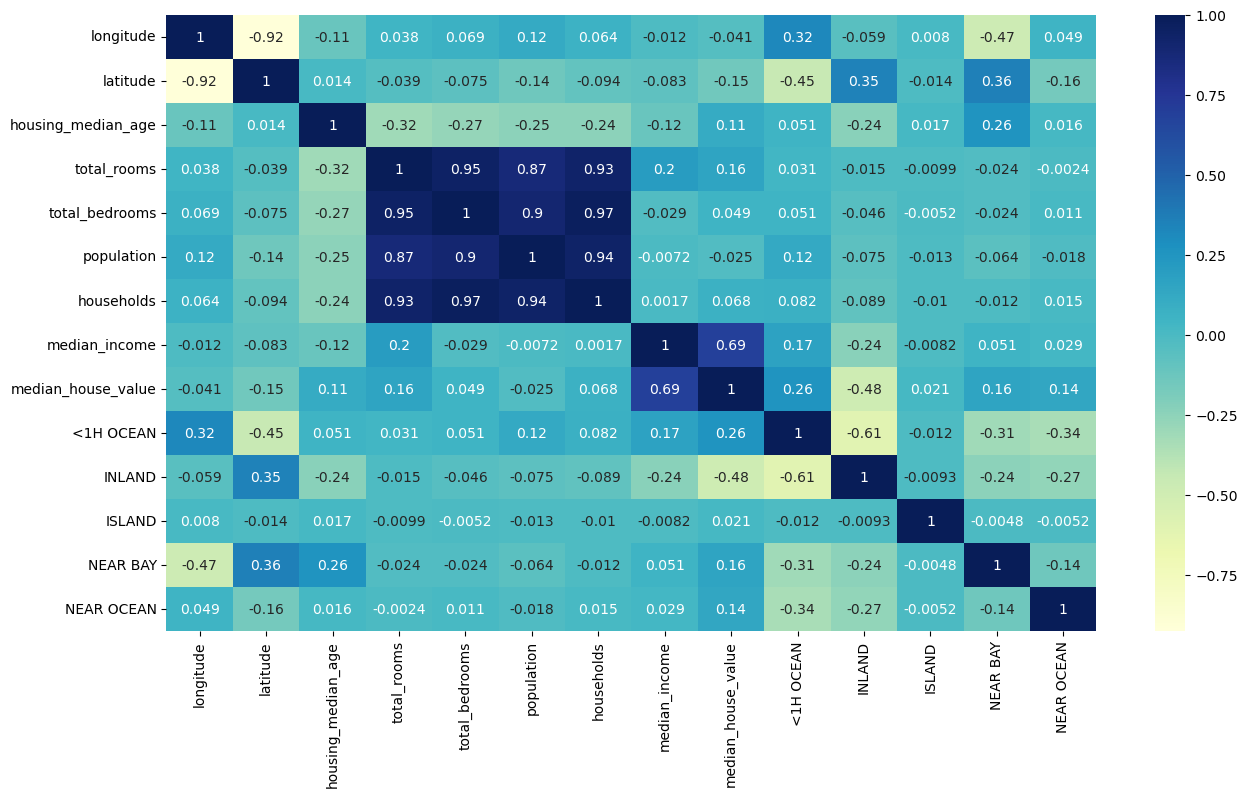

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#features correlation with TARGET VARIABLE
#as shown below, house median value negativley correlates with INLAND

<Axes: xlabel='latitude', ylabel='longitude'>

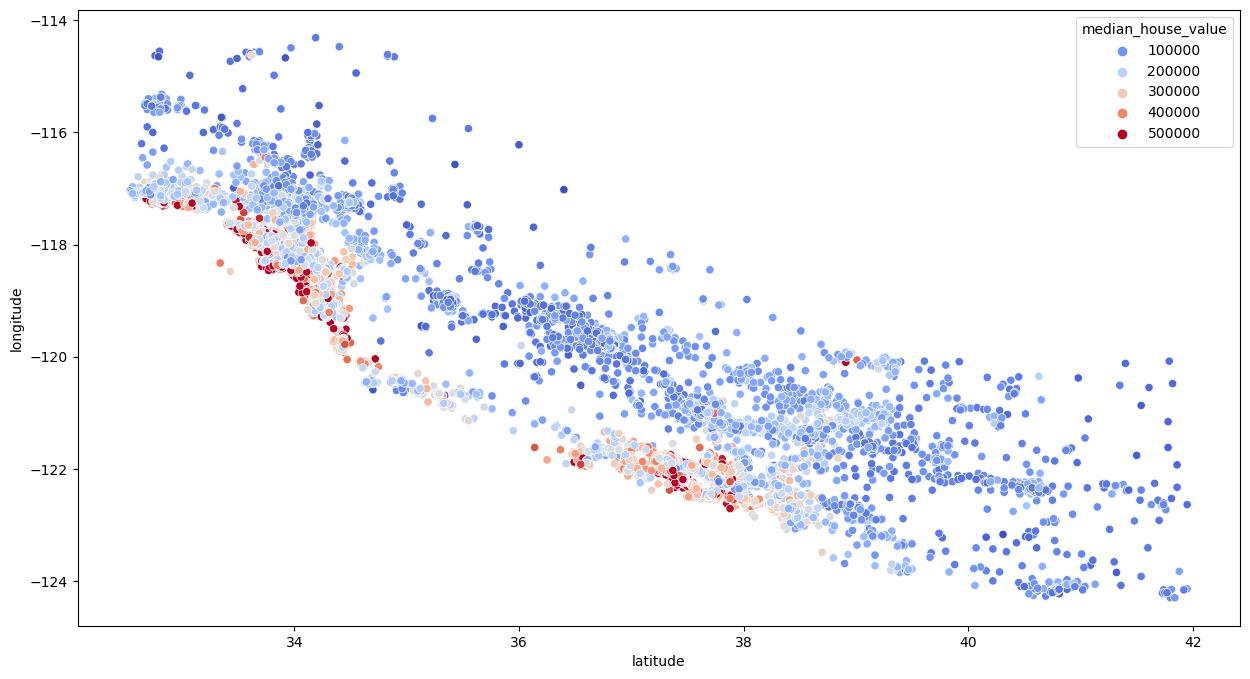

In [24]:
#visualizing the ocean proximity effect on house price

plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue = "median_house_value", palette="coolwarm")

#in the plot below, the more red the price gets, the more expensive it is
#we can assume that the red section is the shore, since it's more expensive and so closer to the ocean

Next, we engineered some new features that we thought would show better and more significant correlation with the traget variable. They are shown below.

In [25]:
#how many rooms are bedrooms?
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
#how many total rooms?
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

#we thought that these engineered features could be more significant than taking the single features on their own

<Axes: >

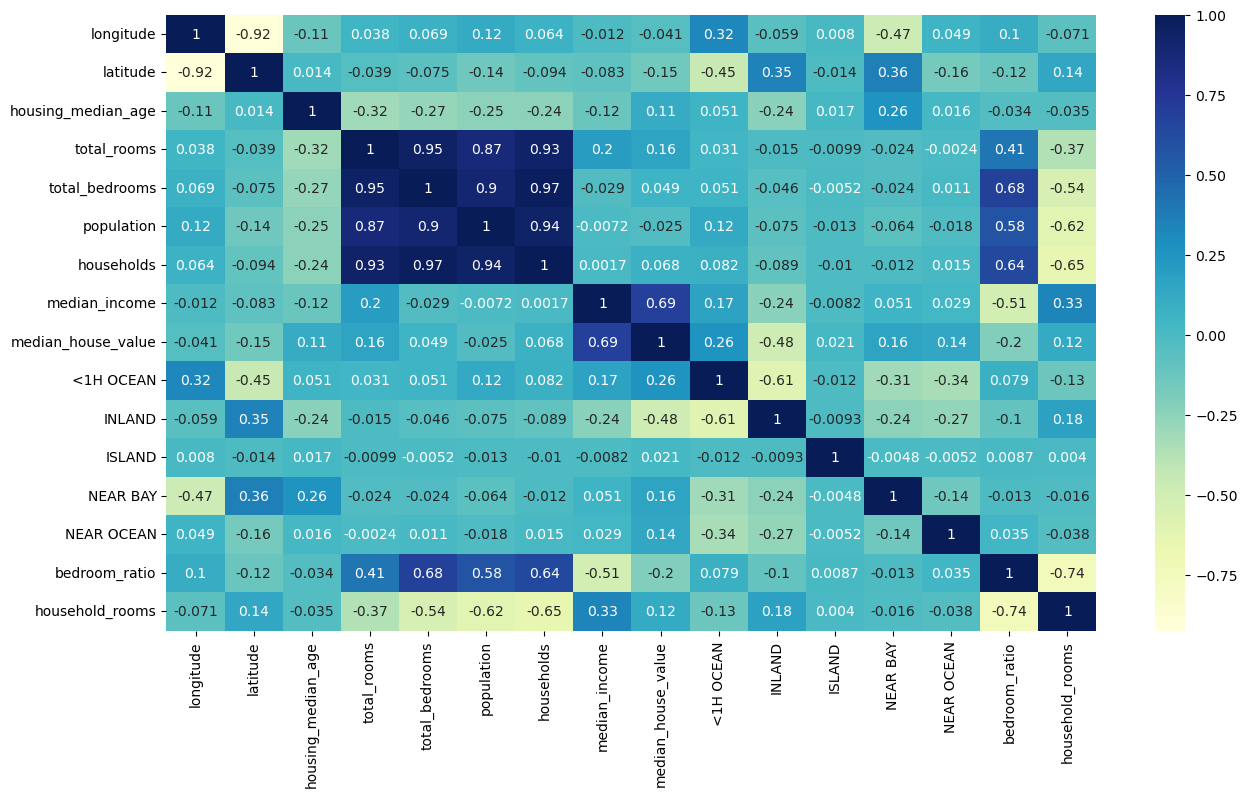

In [26]:
#correlation of rooms/bedrooms to house value
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [27]:
#rooms alone do not show great significance while the bedrooms ratio is more interesting to look at

Finally, we built the two prediction models. We created a linear regression model and a random forest model. Both showed good, but different prediction scores, but the random forest model showed a more accurate prediction score. We also vizualized this difference using scatter plots.

In [28]:
#BUILDING LINEAR REGRESSION MODEL

In [29]:
#Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

#Extract features (X_train) and target variable (y_train) from the training data
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

#Create an instance of the LinearRegression model
reg = LinearRegression()

#Train the Linear Regression model on the training data
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
#preprocessing the testing set
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [31]:
#assigning the testing test without target variable column to x and only the target variable to y
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [32]:
#get prediction score of the regression model
reg.score(X_test, y_test)

0.6630126486095066

In [63]:
#Make predictions for the entire set using the trained Linear Regression model
y_pred_linear_reg_all = reg.predict(X_test)

#Now 'y_pred_linear_reg_all' contains the predicted values for the entire test set
print("Linear Regression Predicted House Prices:")
print(y_pred_linear_reg_all)


Linear Regression Predicted House Prices:
[293813.57534055 277132.97921836  61266.98712567 ... 129509.08262031
 120415.46138829 362762.49001977]


In [40]:
#BUILDING RANDOM FOREST MODEL

In [66]:
#Import the RandomForestRegressor class from scikit-learn
from sklearn.ensemble import RandomForestRegressor

#Create an instance of the RandomForestRegressor model
forest = RandomForestRegressor()

#Train the Random Forest model on the training data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
#Get the prediction score for the Random Forest model
#We applied our model on our testing data and as shown from the output, we got a better result than linear regression
forest.score(X_test, y_test)

0.8134600834416729

In [64]:
#Make predictions for the entire set using the trained Random Forest model
rf_prediction_all = rf_reg.predict(X_test)

#Now 'rf_prediction_all' contains the predicted values for the entire test set
print("Random Forest Predicted House Prices:")
print(rf_prediction_all)


Random Forest Predicted House Prices:
[264400.   323011.02  80325.   ... 110336.   179041.   483938.86]


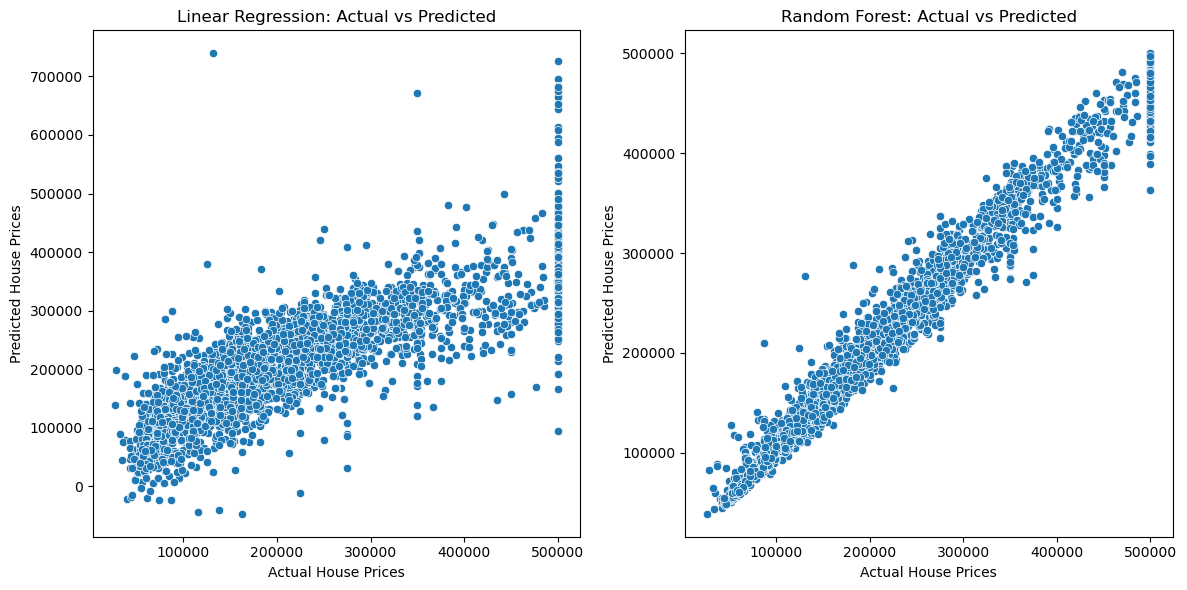

In [65]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

#Train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Train Random Forest model
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_train, y_train)

#Make predictions for both models
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_rf = rf_reg_model.predict(X_test)

#Visualize comparison using scatter plots
plt.figure(figsize=(12, 6))

#Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear_reg)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

#Scatter plot for Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.tight_layout()
plt.show()


The scatter plots above show the prediction accuracy of the models. On the left, the scatter plot of the linear regression sways towards the bottom towards the top, which shows a not so good prediction. This aligns with the 67% prediction score. On the right, however, the random forest scatter plot is tight along the diagonal, which shows a much more accurate prediction of the housing prices. This aligns with the 81% prediction rate.

In conclusion, this project shows the steps to building predictive models using data science techniques.